In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('revenue_prediction.csv')

In [4]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
df.shape

(100, 8)

In [6]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [8]:
unique_cols = []

for i in df.columns:
    if (len(df[i].value_counts().values) < df.shape[0]) & (df[i].dtype == 'object'):
        unique_cols.append(i)
        print(i, ':\n')
        print(df[i].unique())
        print('\n')

Franchise :

['Yes' 'No']


Category :

['Mexican' 'Varied Menu' 'Chicken' 'Italian/Pizza' 'Pizza' 'Seafood'
 'Steak' 'Frozen Desserts' 'Coffee Cafe' 'BBQ' 'Sandwich' 'Bakery Cafe'
 'Burger' 'Asian' 'Family Style' 'Sports Bar' 'Asian/Noodle'
 'Family Casual' 'Snack' 'Healthy']


City :

['Bengaluru' 'Gurugram' 'Pune' 'Mumbai' 'Noida']




In [9]:
unique_cols

['Franchise', 'Category', 'City']

In [10]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [11]:
customer_15 = df.iloc[15]
customer_15

Id                              116
Name            Dickey'sBarbecuePit
Franchise                        No
Category                Bakery Cafe
City                      Bengaluru
No_Of_Item                       36
Order_Placed                    3.1
Revenue                     3918918
Name: 15, dtype: object

In [12]:
customer_90 = df.iloc[90]
customer_90


Id                       191
Name              FarmerBoys
Franchise                 No
Category        Family Style
City               Bengaluru
No_Of_Item                40
Order_Placed             3.3
Revenue              3426169
Name: 90, dtype: object

In [13]:
blr_mex_frch = df[(df.City == 'Bengaluru') & (df.Franchise == 'Yes') & (df.Category == 'Mexican')]
print(f"Mexican franchise in Bengaluru")
blr_mex_frch

Mexican franchise in Bengaluru


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753


In [14]:
itl_pizz_frch = df[(df.Franchise == 'Yes') & (df.Category == 'Italian/Pizza')]
print('Italian Pizza Franchise outlets')
itl_pizz_frch

Italian Pizza Franchise outlets


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
36,137,BarLouie,Yes,Italian/Pizza,Noida,35,2.8,3028267
62,163,Fuzzy'sTacoShop,Yes,Italian/Pizza,Bengaluru,57,5.1,5286212
78,179,Sonny'sBBQ,Yes,Italian/Pizza,Bengaluru,42,3.5,3871344


In [15]:
pizza_frch  =  df[(df.Franchise == 'Yes') & (df.Category == 'Pizza')]
print('Normal Pizza franchise outlets')
pizza_frch

Normal Pizza franchise outlets


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
7,108,LongJohnSilver's,Yes,Pizza,Mumbai,49,4.3,6491607
11,112,TexasdeBrazilChurrascaria,Yes,Pizza,Bengaluru,56,5.0,3861370


In [16]:
mumbai_frch = df[(df.Franchise == 'Yes') & (df.City == 'Mumbai')]
print('Franchises present in Mumbai:')
mumbai_frch

Franchises present in Mumbai:


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
7,108,LongJohnSilver's,Yes,Pizza,Mumbai,49,4.3,6491607
8,109,SaltgrassSteakHouse,Yes,Mexican,Mumbai,59,4.8,5152497
24,125,Schlotzsky's,Yes,BBQ,Mumbai,110,8.8,7904084
35,136,AuBonPain,Yes,Asian/Noodle,Mumbai,41,3.6,3903884
40,141,Torchy'sTacos,Yes,Seafood,Mumbai,75,6.7,6836483
56,157,UncleJulio's,Yes,Mexican,Mumbai,27,2.1,2390534
67,168,Souplantation&SweetTomatoes,Yes,Steak,Mumbai,40,3.8,4052733
72,173,UnoPizzeria&Grill,Yes,Family Casual,Mumbai,31,2.4,2525375
87,188,MountainMike'sPizza,Yes,Varied Menu,Mumbai,67,5.8,5906596


In [17]:
cities = list(df.City.unique())

def city_franchises():

    for i in cities:
        print(i)
        display(df[(df.Franchise == 'Yes') & (df.City == i)])
        print('\n')
            

In [18]:
city_franchises()

Bengaluru


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
11,112,TexasdeBrazilChurrascaria,Yes,Pizza,Bengaluru,56,5.0,3861370
12,113,ColdStoneCreamery,Yes,Coffee Cafe,Bengaluru,22,1.6,2234634
13,114,BlazePizza,Yes,BBQ,Bengaluru,55,4.7,5107746
16,117,ZoesKitchen,Yes,Burger,Bengaluru,123,10.8,19696939
28,129,FogodeChao,Yes,Family Style,Bengaluru,55,4.6,7705945
30,131,VillageInn,Yes,Steak,Bengaluru,35,2.9,2408199
31,132,TacoCabana,Yes,Coffee Cafe,Bengaluru,25,1.9,2358644
42,143,PappadeauxSeafoodKitchen,Yes,Asian/Noodle,Bengaluru,55,4.8,4952255
44,145,PeiWeiAsianDiner,Yes,Steak,Bengaluru,48,4.0,4264176




Gurugram


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
17,118,CornerBakery_Cafe,Yes,Asian,Gurugram,100,8.1,7513524
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797




Pune


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
9,110,ChuckE.Cheese's,Yes,Steak,Pune,76,5.3,4544227
18,119,KrystalCo.,Yes,Varied Menu,Pune,59,5.2,4937526
50,151,Seasons52,Yes,Bakery Cafe,Pune,23,1.9,2156098
57,158,Fazoli's,Yes,Seafood,Pune,39,3.1,3258837
66,167,LazyDogRestaurant&Bar,Yes,Family Style,Pune,23,1.7,1882131
82,183,JohnnyRockets,Yes,Family Style,Pune,49,3.6,3807496
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689




Mumbai


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
7,108,LongJohnSilver's,Yes,Pizza,Mumbai,49,4.3,6491607
8,109,SaltgrassSteakHouse,Yes,Mexican,Mumbai,59,4.8,5152497
24,125,Schlotzsky's,Yes,BBQ,Mumbai,110,8.8,7904084
35,136,AuBonPain,Yes,Asian/Noodle,Mumbai,41,3.6,3903884
40,141,Torchy'sTacos,Yes,Seafood,Mumbai,75,6.7,6836483
56,157,UncleJulio's,Yes,Mexican,Mumbai,27,2.1,2390534
67,168,Souplantation&SweetTomatoes,Yes,Steak,Mumbai,40,3.8,4052733
72,173,UnoPizzeria&Grill,Yes,Family Casual,Mumbai,31,2.4,2525375
87,188,MountainMike'sPizza,Yes,Varied Menu,Mumbai,67,5.8,5906596




Noida


,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
5,106,Maggiano'sLittleItaly,Yes,Seafood,Noida,56,4.9,4517319
6,107,Cicis,Yes,Steak,Noida,58,5.0,5966635
20,121,Cooper'sHawkWinery&Restaurants,Yes,Family Style,Noida,62,5.4,5025735
22,123,BlackBearDiner,Yes,Sandwich,Noida,45,3.8,4956086
36,137,BarLouie,Yes,Italian/Pizza,Noida,35,2.8,3028267
37,138,SarkuJapan,Yes,Burger,Noida,34,2.6,2740687
52,153,PretAManger,Yes,Family Style,Noida,27,1.6,1763231
54,155,HuddleHouse,Yes,Mexican,Noida,55,4.5,4651866
68,169,Friendly's,Yes,Sandwich,Noida,44,3.6,3836721


In [19]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [20]:
unique_cols

['Franchise', 'Category', 'City']

In [21]:
df2 = df.copy()

In [22]:
df2.drop(columns = ['Id', 'Name'], axis = 1, inplace = True)

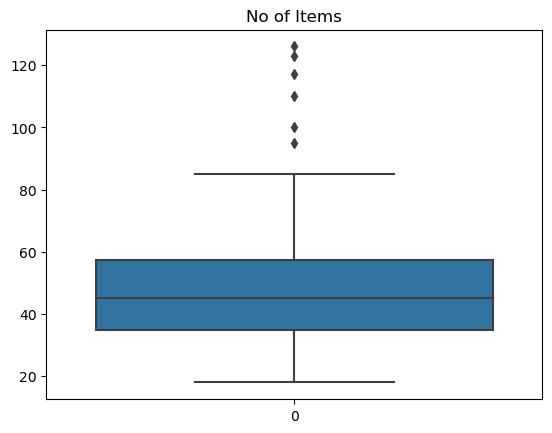

In [23]:
sns.boxplot(df2.No_Of_Item).set_title('No of Items')
plt.show()

In [24]:
q1_noi = df2.No_Of_Item.quantile(0.25)
q3_noi = df2.No_Of_Item.quantile(0.75)

In [25]:
iqr_noi = q3_noi - q1_noi
iqr_noi

22.5

In [26]:
upper_fence_noi = q3_noi + 1.5 * iqr_noi
lower_fence_noi = q1_noi - 1.5 * iqr_noi

In [27]:
df2 = df2[(df2.No_Of_Item >= lower_fence_noi) & (df2.No_Of_Item <= upper_fence_noi)]

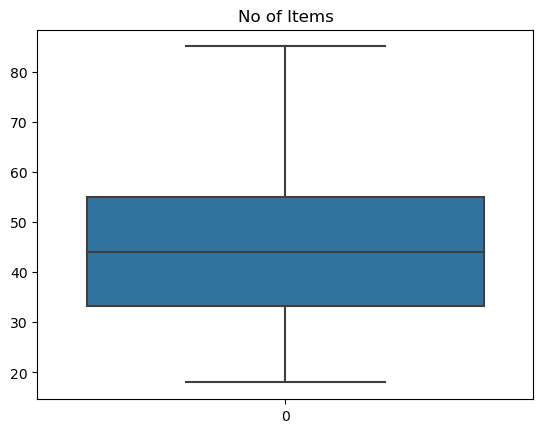

In [28]:
sns.boxplot(df2.No_Of_Item).set_title('No of Items')
plt.show()

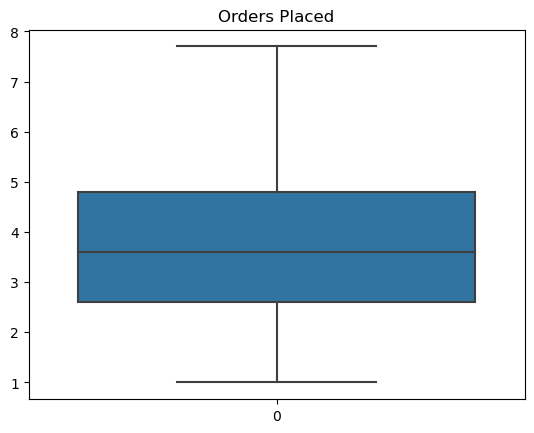

In [29]:
sns.boxplot(df2.Order_Placed).set_title('Orders Placed')
plt.show()

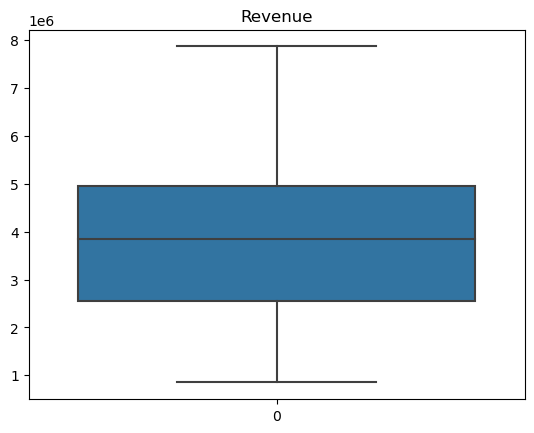

In [30]:
sns.boxplot(df2.Revenue).set_title('Revenue')
plt.show()

In [31]:
df2.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715


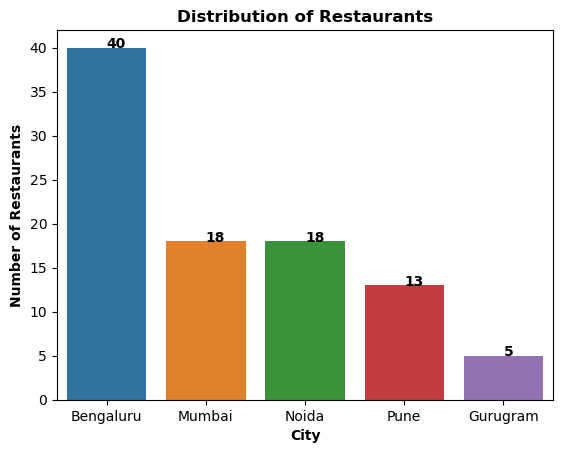

In [32]:
x = df2.City.value_counts().keys()
y = df2.City.value_counts()
sns.barplot(x = x, y = y).set_title('Distribution of Restaurants', fontweight = 'bold')
for index, value in enumerate(list(y)):
    plt.text(index, value,
            str(value), fontweight = 'bold')
plt.xlabel('City', fontweight = 'bold')
plt.ylabel('Number of Restaurants', fontweight = 'bold')
plt.show()

* Most number of restaurants are located in Bengaluru followed by Mumbai, Noida, Pune, Gurugram

In [33]:
df2.columns

Index(['Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue'],
      dtype='object')

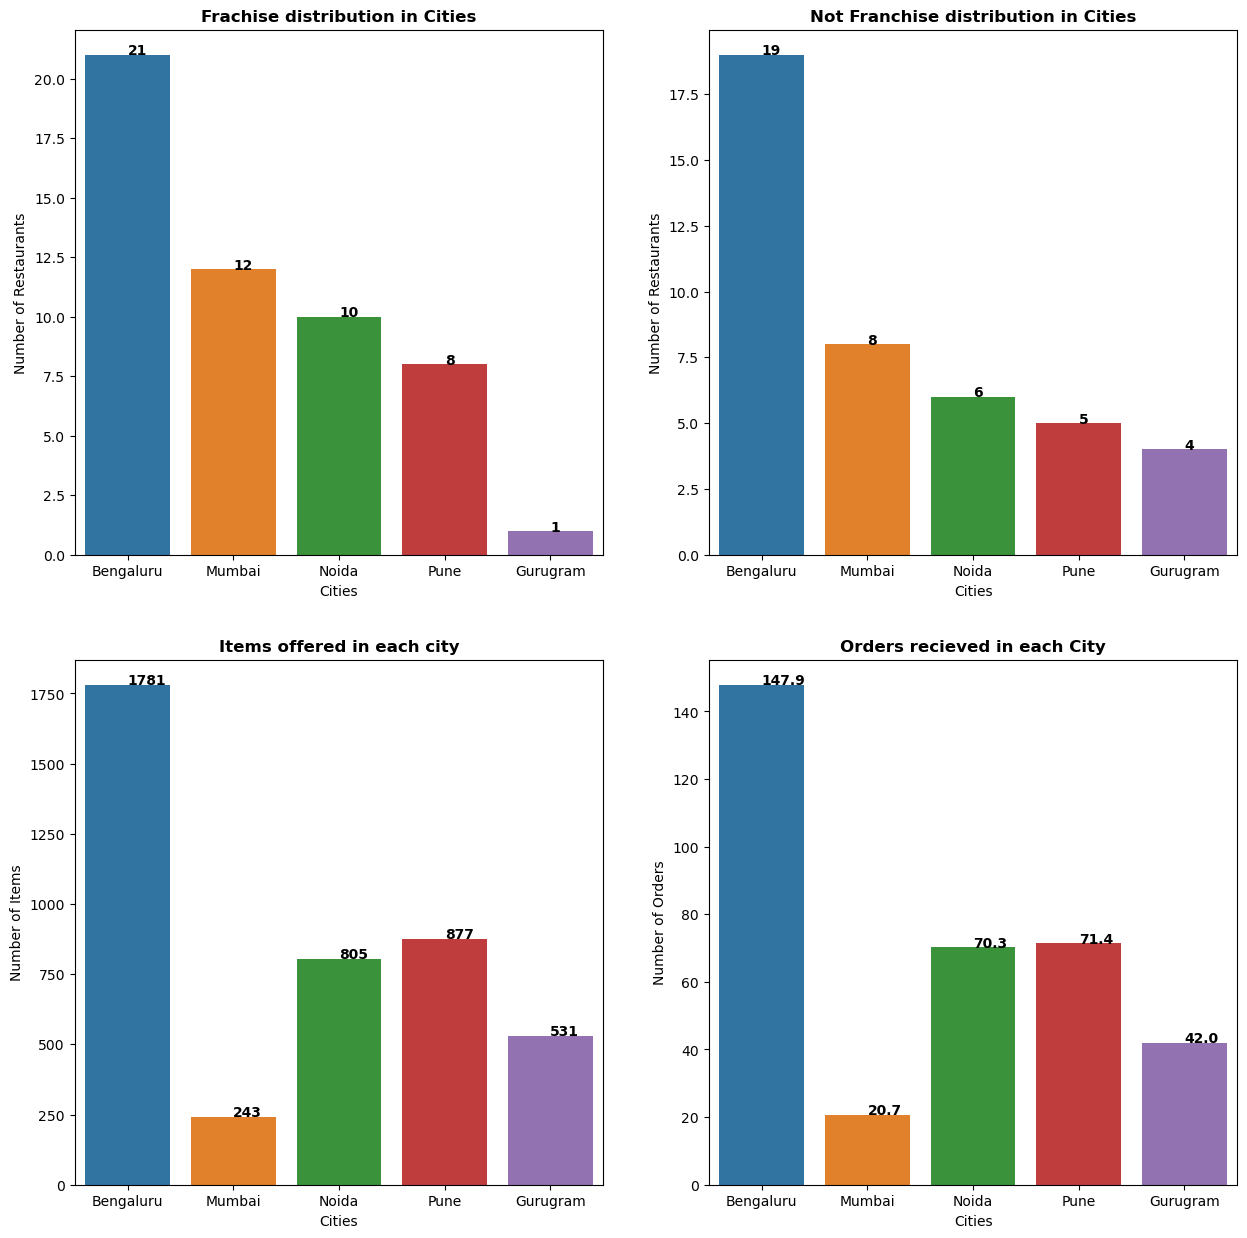

In [34]:
Cities = df2.City.value_counts().keys()
Number_of_Franchise_restaurants = df2.City[df2.Franchise == 'Yes'].value_counts()
Number_of_normal_restaurants = df2.City[df2.Franchise == 'No'].value_counts()
Number_of_items = df2.groupby('City').No_Of_Item.sum()
Number_of_orders = df2.groupby('City').Order_Placed.sum().round(2)

plt.figure(figsize = (15, 15))

plt.subplot(221)
sns.barplot(x = Cities, y = Number_of_Franchise_restaurants).set_title('Frachise distribution in Cities', fontweight = 'bold')
for index, value in enumerate(list(Number_of_Franchise_restaurants)):
    plt.text(index, value, str(value), fontweight = 'bold')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')

plt.subplot(222)
sns.barplot(x = Cities, y = Number_of_normal_restaurants).set_title('Not Franchise distribution in Cities', fontweight = 'bold')
for index, value in enumerate(list(Number_of_normal_restaurants)):
    plt.text(index, value, str(value), fontweight = 'bold')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')

plt.subplot(223)
sns.barplot(x = Cities, y = Number_of_items).set_title('Items offered in each city', fontweight = 'bold')
for index, value in enumerate(list(Number_of_items)):
    plt.text(index, value, str(value), fontweight = 'bold')
plt.xlabel('Cities')
plt.ylabel('Number of Items')

plt.subplot(224)
sns.barplot(x = Cities, y = Number_of_orders).set_title('Orders recieved in each City', fontweight = 'bold')
for index, value in enumerate(list(Number_of_orders)):
    plt.text(index, value, str(value), fontweight = 'bold')
plt.xlabel('Cities')
plt.ylabel('Number of Orders')

plt.show()

* Most number Franchises are located in Bengaluru followed by Noida, Mumbai, Pune, Gurugram
* Most Normal restaurants are located in Bengaluru followed by Mumbai, Noida, Gurugram, Pune
* Most number of items are being offered in Bengaluru and least in Mumbai city
* On average most number of orders are being received in Bengaluru @ 178.8 and least in Mumbai @ 37.3
* We can interpret that the City which offers more items are receiving more orders and the least offers receives least number of orders.

In [35]:
df2.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715


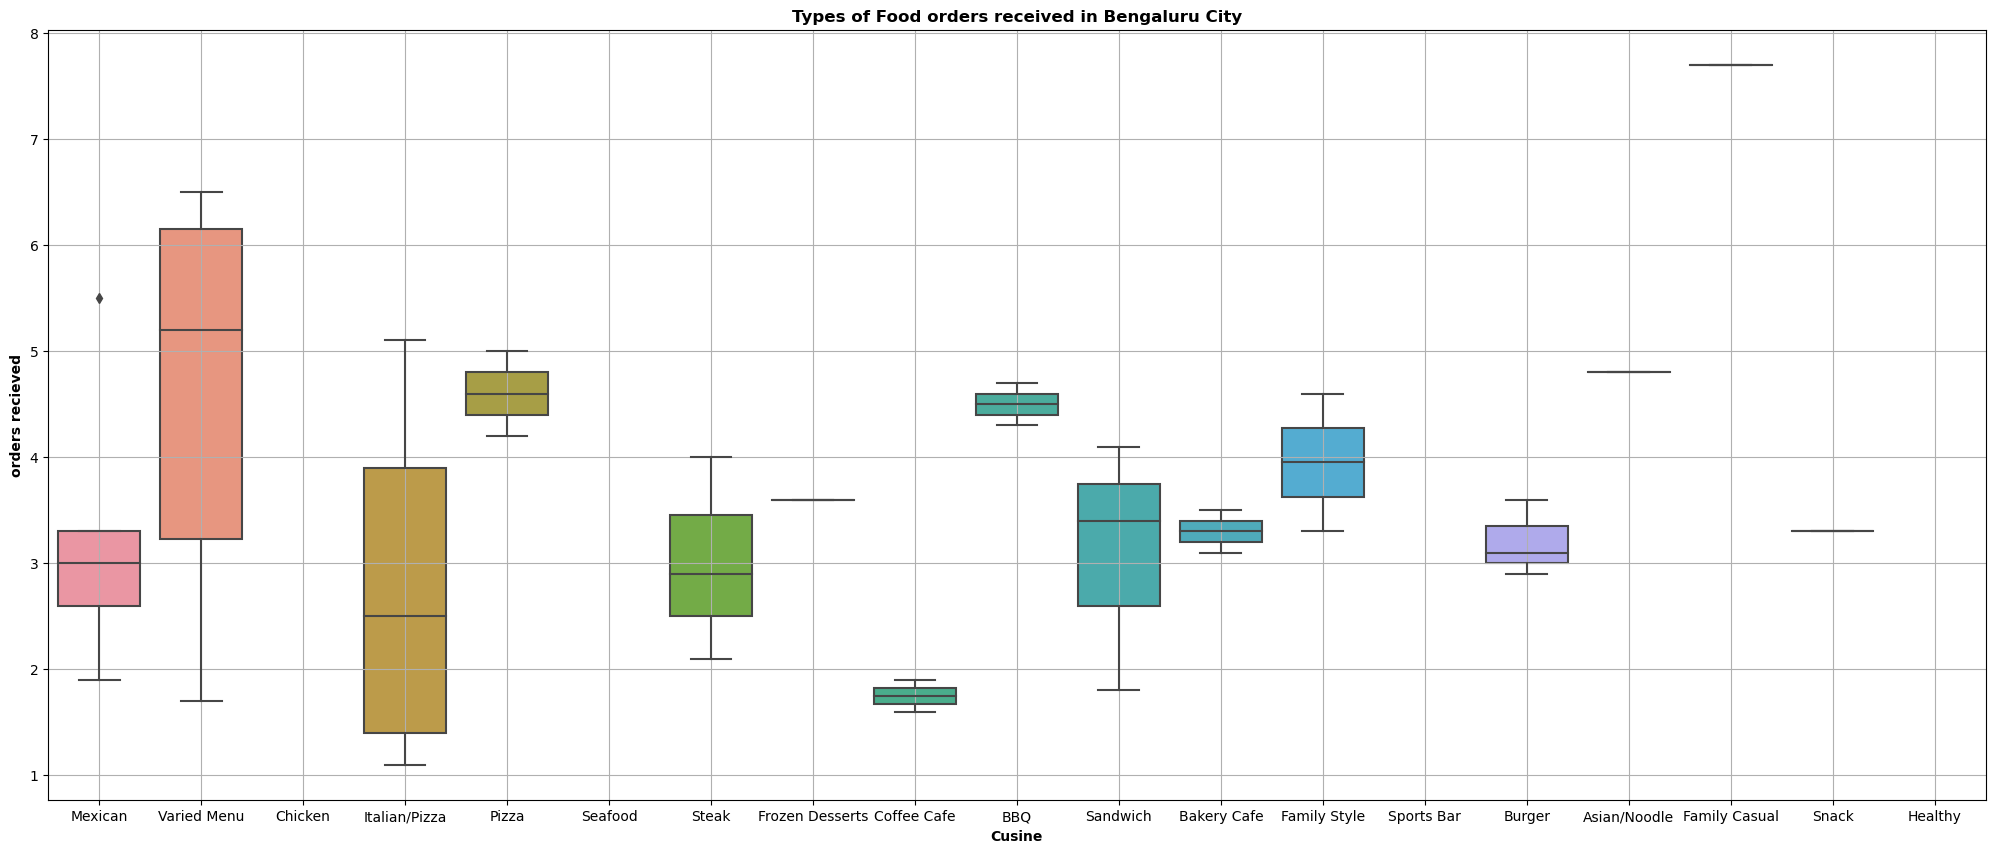

In [36]:
plt.figure(figsize = (25, 10))
sns.boxplot(x = df2.Category, y = df2.Order_Placed[df2.City == 'Bengaluru']).set_title('Types of Food orders received in Bengaluru City', fontweight = 'bold')
plt.xlabel('Cusine', fontweight = 'bold')
plt.ylabel('orders recieved', fontweight = 'bold')
plt.grid()
plt.show()

* "Varied Menu" has the highest average order rate i.e., around 5.5.
* None of the orders are being placed in the Health, Chicken, Seafood, or Sport Bar categories.
* A Very Negligible amount of orders are being placed in Frozen Desserts, Asian/Noodle, Family Causal, and Snack Categories.
* The "Bakery Cafe" Category received the highest orders of around 13.5 but had an average order rate of around 3.7.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

sc = StandardScaler()
le = LabelEncoder()
lir = LinearRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 50)

In [38]:
for i in df2.columns:
 #   if df2[i].dtype != 'object':
 #       df2[i] = np.round(sc.fit_transform(df2[[i]]), 2)
    
    if df2[i].dtype == 'object':
        df2[i] = le.fit_transform(df2[i])

In [39]:
df2.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,11,0,55,5.5,5953753
1,0,18,1,72,6.8,7223131
2,1,4,4,25,1.9,2555379
3,1,10,2,18,2.5,2175511
4,1,12,3,48,4.2,4816715


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for i in df2.columns:
    if i != 'Revenue':
        col_list.append(i)

In [41]:
x = df2[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,Features,VIF
0,Franchise,2.109500
1,Category,5.212688
2,City,2.033300
3,No_Of_Item,134.525878
4,Order_Placed,115.368127


In [42]:
drop_columns = vif_data.Features[vif_data.VIF < 5].to_list()
drop_columns

['Franchise', 'City']

In [43]:
#df2.drop(columns = drop_columns, axis = 1, inplace = True)

In [44]:
df2.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,11,0,55,5.5,5953753
1,0,18,1,72,6.8,7223131
2,1,4,4,25,1.9,2555379
3,1,10,2,18,2.5,2175511
4,1,12,3,48,4.2,4816715


In [45]:
x = df2.drop(columns = ['Franchise', 'Category', 'City', 'Revenue'], axis = 1)
y = df2.Revenue

In [46]:
x

,No_Of_Item,Order_Placed
0,55,5.5
1,72,6.8
2,25,1.9
3,18,2.5
4,48,4.2
...,...,...
95,19,1.1
96,75,6.3
97,77,6.2
98,25,2.1


In [47]:
y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 94, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, shuffle = True)

In [49]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Linear Regression

In [50]:
lir.fit(x_train, y_train)

LinearRegression()

In [51]:
lir_predict = lir.predict(x_test)

In [52]:
print('R-sq value:', round(metrics.r2_score(y_test, lir_predict), 2))

R-sq value: 0.83


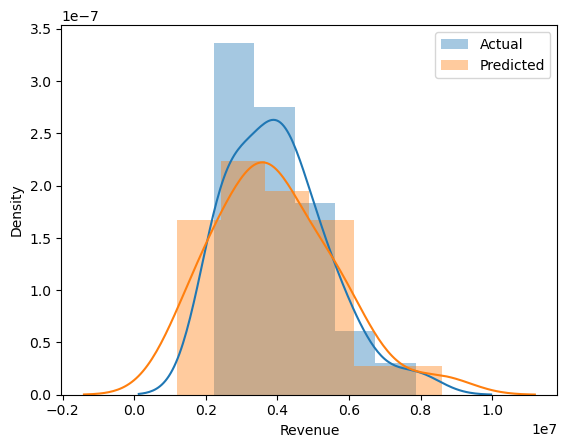

In [53]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(lir_predict, label = 'Predicted')
plt.legend()
plt.show()

In [54]:
print("Mean absolute Error:", round(metrics.mean_absolute_error(y_test, lir_predict), 2))
print('Mean Absolute Percentage Error:', round(metrics.mean_absolute_percentage_error(y_test, lir_predict), 2))
print('Root Mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, lir_predict)), 2))

Mean absolute Error: 442615.73
Mean Absolute Percentage Error: 0.13
Root Mean squared error: 562830.26


### Decision Tree Classifier

In [55]:
df2.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,11,0,55,5.5,5953753
1,0,18,1,72,6.8,7223131
2,1,4,4,25,1.9,2555379
3,1,10,2,18,2.5,2175511
4,1,12,3,48,4.2,4816715


In [56]:
x1 = df2.drop(columns = ['Revenue'], axis = 1)
y1 = df2.Revenue

In [57]:
x1_train, x1_test, y1_train, y1_test  = train_test_split(x1, y1, test_size = 0.2, random_state = 42, shuffle = True)

In [58]:
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1_test)

In [59]:
dtc.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [60]:
dtc_predict = dtc.predict(x1_test)

In [61]:
print('Accuracy Score:', round(metrics.accuracy_score(y1_test, dtc_predict)))
print("Mean absolute Error:", round(metrics.mean_absolute_error(y1_test, dtc_predict), 2))
print('Mean Absolute Percentage Error:', round(metrics.mean_absolute_percentage_error(y1_test, dtc_predict), 2))
print('Root Mean squared error:', round(np.sqrt(metrics.mean_squared_error(y1_test, dtc_predict)), 2))

Accuracy Score: 0
Mean absolute Error: 786534.0
Mean Absolute Percentage Error: 0.18
Root Mean squared error: 1263204.79


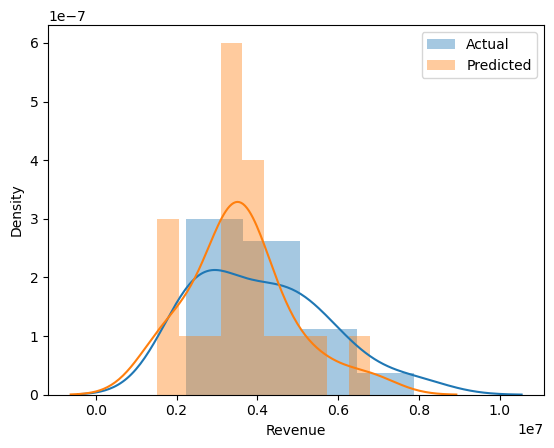

In [62]:
sns.distplot(y1_test, label = 'Actual')
sns.distplot(dtc_predict, label = 'Predicted')
plt.legend()
plt.show()

### Random Forest Classifier

In [63]:
rfc.fit(x1_train, y1_train)

RandomForestClassifier(n_estimators=50)

In [64]:
rfc_predict = rfc.predict(x1_test)

In [65]:
print('Accuracy Score:', round(metrics.accuracy_score(y1_test, rfc_predict)))
print("Mean absolute Error:", round(metrics.mean_absolute_error(y1_test, rfc_predict), 2))
print('Mean Absolute Percentage Error:', round(metrics.mean_absolute_percentage_error(y1_test, rfc_predict), 2))
print('Root Mean squared error:', round(np.sqrt(metrics.mean_squared_error(y1_test, rfc_predict)), 2))

Accuracy Score: 0
Mean absolute Error: 561403.95
Mean Absolute Percentage Error: 0.17
Root Mean squared error: 743142.37


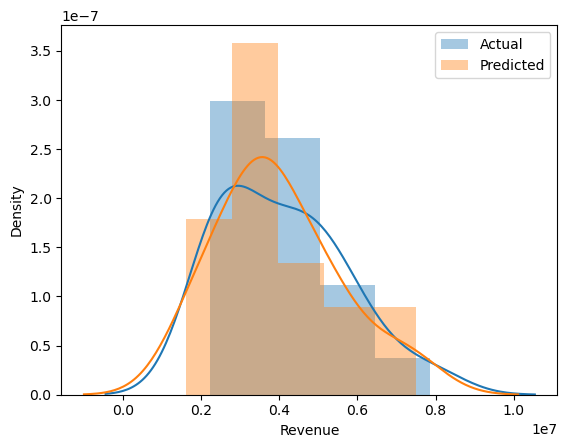

In [66]:
sns.distplot(y1_test, label = 'Actual')
sns.distplot(rfc_predict, label = 'Predicted')
plt.legend()
plt.show()

* Since ouput is linear, Linear Regression Classifier is suitable for this model